# ANOVA y MUTUAL INFORMATION para Problemas de Clasificación

# F-Test ANOVA 

ANOVA = (**AN**alysis **O**f **VA**riance)

**x: continua**  
**y: categórica (Clasificación)**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import shapiro

In [6]:
df = pd.read_csv(r'data/iris.tab', sep='\t', engine='python')
df.head()

,sepal length,sepal width,petal length,petal width,iris
0,c,c,c,c,d
1,NaN,NaN,NaN,NaN,class
2,5.1,3.5,1.4,0.2,Iris-setosa
3,4.9,3.0,1.4,0.2,Iris-setosa
4,4.7,3.2,1.3,0.2,Iris-setosa


Veamos un poco qué datos tenemos con describe():

In [7]:
df.describe(include = 'all')

,sepal length,sepal width,petal length,petal width,iris
count,151,151,151,151,152
unique,36,24,44,23,5
top,5.0,3.0,1.5,0.2,Iris-versicolor
freq,10,26,14,28,50


Queremos ver si estas features guardan alguna relación con la y, así que veamos cuáĺes son las clases de y:

In [8]:
df = df.drop([0, 1],axis = 0)
etiquetas = df.iris.unique() #lst_clases
columnas = df.columns.values
columnas = np.delete(columnas,[4])

In [9]:
etiquetas

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
columnas

array(['sepal length', 'sepal width', 'petal length', 'petal width'],
      dtype=object)

In [11]:
df_X = df.drop(columns=['iris'])
df_y = df.iris

In [12]:
pd.set_option('display.max_rows', None)  # para que muestre todas las filas
df.sort_values(by=['iris']);

In [13]:
q_observaciones = df.shape[0]
unos = np.ones(q_observaciones)
df['unos'] = unos     # agrego una columna auxiliar a df formada por unos, sólo para poder asignar una altura vertical en el siguiente gráfico. Luego la quitaremos

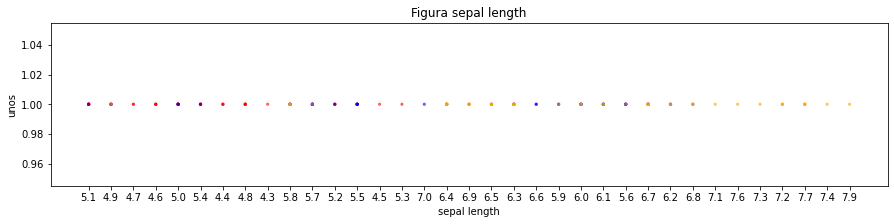

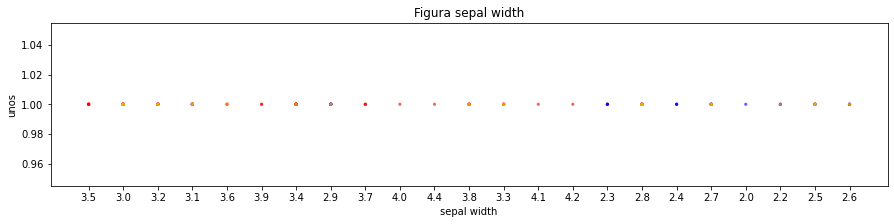

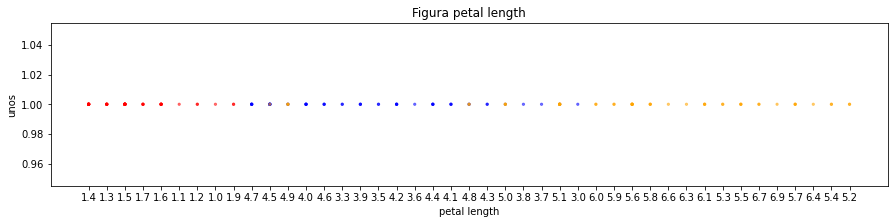

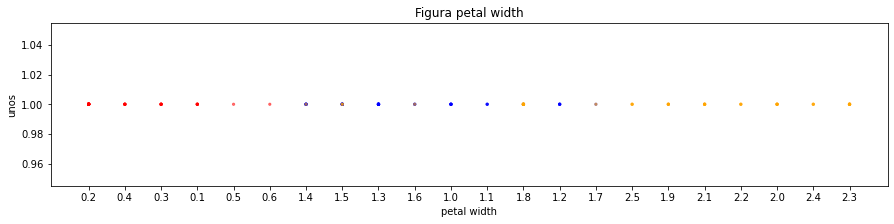

In [14]:
# Asigaremos el color rojo a las observaciones A, azul a las B y verde a las C:
colores = np.where(df.iris == etiquetas[0], 'red', np.where(df.iris == etiquetas[1], 'blue', np.where(df.iris == etiquetas[2], 'orange','green')))

for i in columnas:
    df.plot.scatter(i,'unos', c = colores, figsize=(15, 3), s=5, alpha=0.5, title = 'Figura '+i)

In [15]:
# Eliminemos esa columna auxiliar de unos antes que hagamos lío.
df = df.drop('unos', axis='columns')   # elimino la columna de unos

- El primero de los gŕaficos nos muestra bastante claramente que hay una relación entre los valores de $x_1$ y las clases A, B , C. De hecho, a medida que crece $x_1$  pasamos muy claramente de rojo a azul y de azul a verde. Hay una muy clara relación, "los colores no se mezclan".   
 
- En el segundo caso se ve que los colores están todos mezclados por lo que no hay relación evidente entre los valores de $x_2$ e $y$.  


- El tercero es un tanto dudoso, se ven más puntos rojos a la izquierda y verdes a la derecha. En la zona central, si bien predominan los azules, hay de todos los colores ...   


Si con los gráficos anteriores ya estamos seguros, podríamos mantener o quitar variables de nuestro dataset ... pero si no estamos tan seguros y queremos algo más estadístico, podemos ver cómo funciona ANOVA.



## ANOVA - Fundamentos

Veamos un poco la distrubución de la variable $x_1$ con su gráfico de densidad:

In [16]:
y = {}

for columna in columnas:
    y[columna] = {}
    for etiqueta in etiquetas:
        y[columna][etiqueta] = df[columna][df.iris == etiqueta].astype(float)

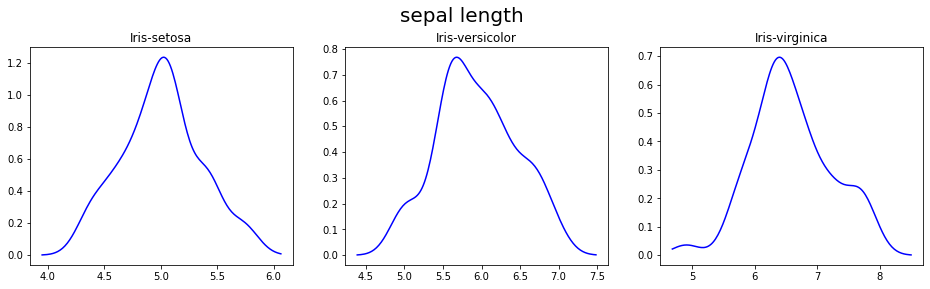

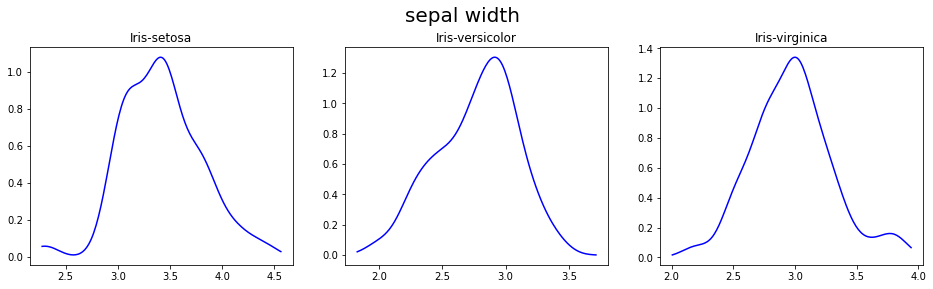

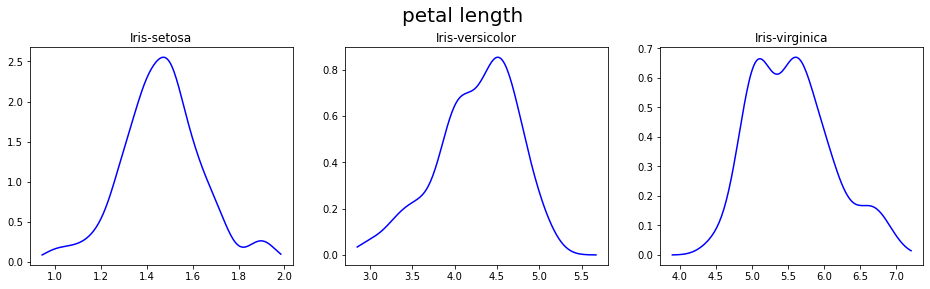

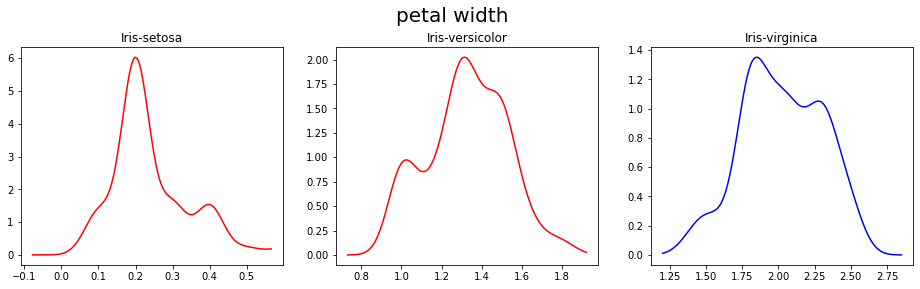

In [17]:
for columna in columnas:
  
    xs = np.linspace(3,10,200)

    fig, ax = plt.subplots(1, len(etiquetas), figsize=(16,4))
    fig.suptitle(columna, fontsize=20, y=1.02)
    
    aux = 0
    for etiqueta in etiquetas:        
        
        #Prueba Shapiro
        alpha = 0.05
        W, p = shapiro(y[columna][etiqueta])
        if p > alpha:
            #Distribución Gausiana
            color = 'Blue'
        else:
            color = 'Red'
        # #Preparo x y para gráfico de densidad
        std = y[columna][etiqueta].std()
        mean = y[columna][etiqueta].mean()
        xs = np.linspace((mean - 3 * std), (mean + 3 * std),200)
        density = gaussian_kde(y[columna][etiqueta])
        density.covariance_factor = lambda : .35
        density._compute_covariance()
        
        #Ploteo la curva de color según el resultado de shapiro
        ax[aux].plot(xs,density(xs), color)
        ax[aux].set_title(etiqueta)
        aux = aux + 1

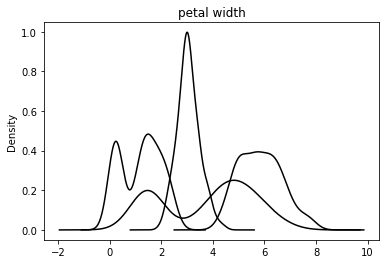

In [18]:
for i in columnas:
    df[i] = df[i].astype(float)
    df[i].plot.kde(color = 'black', title = i)

In [34]:
# 1er columna

x1A = df['sepal length'][df.iris == 'Iris-setosa']
df1A=pd.DataFrame(x1A) 
df1A.columns=['x1A']

x1B = df['sepal length'][df.iris == 'Iris-versicolor']
df1B=pd.DataFrame(x1B)
df1B.columns=['x1B'] 

x1C=df['sepal length'][df.iris == 'Iris-virginica']
df1C=pd.DataFrame(x1C)
df1C.columns=['x1C']

# 2da columna

x2A = df['sepal width'][df.iris == 'Iris-setosa']
df2A=pd.DataFrame(x2A) 
df2A.columns=['x2A']

x2B = df['sepal width'][df.iris == 'Iris-versicolor']
df2B=pd.DataFrame(x2B)
df2B.columns=['x2B'] 

x2C=df['sepal width'][df.iris == 'Iris-virginica']
df2C=pd.DataFrame(x2C)
df2C.columns=['x2C']

# 3er columna

x3A = df['petal length'][df.iris == 'Iris-setosa']
df3A=pd.DataFrame(x3A) 
df3A.columns=['x3A']

x3B = df['petal length'][df.iris == 'Iris-versicolor']
df3B=pd.DataFrame(x3B)
df3B.columns=['x3B'] 

x3C=df['petal length'][df.iris == 'Iris-virginica']
df3C=pd.DataFrame(x3C)
df3C.columns=['x3C']

# 4ta columna

x4A = df['petal width'][df.iris == 'Iris-setosa']
df4A=pd.DataFrame(x4A) 
df4A.columns=['x4A']

x4B = df['petal width'][df.iris == 'Iris-versicolor']
df4B=pd.DataFrame(x3B)
df4B.columns=['x4B'] 

x4C=df['petal width'][df.iris == 'Iris-virginica']
df4C=pd.DataFrame(x4C)
df4C.columns=['x4C']


<AxesSubplot:title={'center':'Figura 7'}, ylabel='Density'>

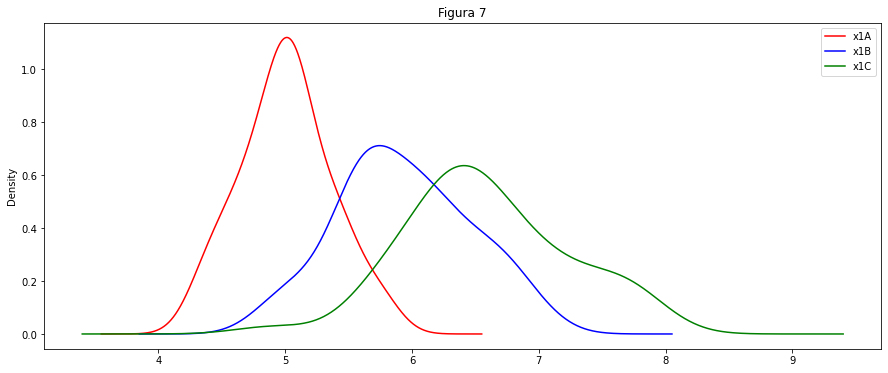

In [39]:
ax = df1A.plot.kde(color= 'red', figsize=(15, 6), label= 'A', title="Figura 7")

df1B.plot.kde(color= 'blue', label= 'B',ax=ax)  # al decirle ax=ax lo ubicamos en el mismo gráfico anterior
df1C.plot.kde(color= 'green',label= 'C',ax=ax)

<AxesSubplot:title={'center':'Figura 7'}, ylabel='Density'>

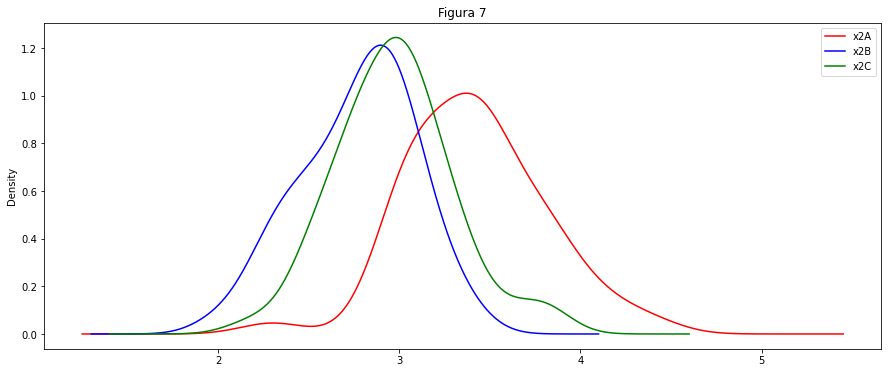

In [40]:
ax = df2A.plot.kde(color= 'red', figsize=(15, 6), label= 'A', title="Figura 7")

df2B.plot.kde(color= 'blue', label= 'B',ax=ax)  # al decirle ax=ax lo ubicamos en el mismo gráfico anterior
df2C.plot.kde(color= 'green',label= 'C',ax=ax)

<AxesSubplot:title={'center':'Figura 7'}, ylabel='Density'>

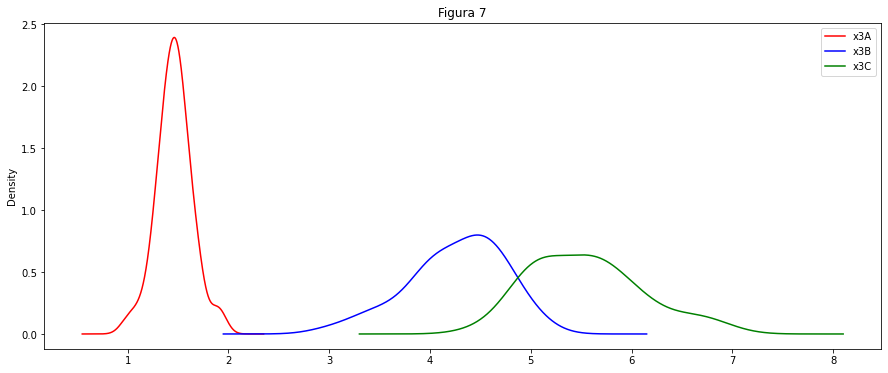

In [42]:
ax = df3A.plot.kde(color= 'red', figsize=(15, 6), label= 'A', title="Figura 7")

df3B.plot.kde(color= 'blue', label= 'B',ax=ax)  # al decirle ax=ax lo ubicamos en el mismo gráfico anterior
df3C.plot.kde(color= 'green',label= 'C',ax=ax)

<AxesSubplot:title={'center':'Figura 7'}, ylabel='Density'>

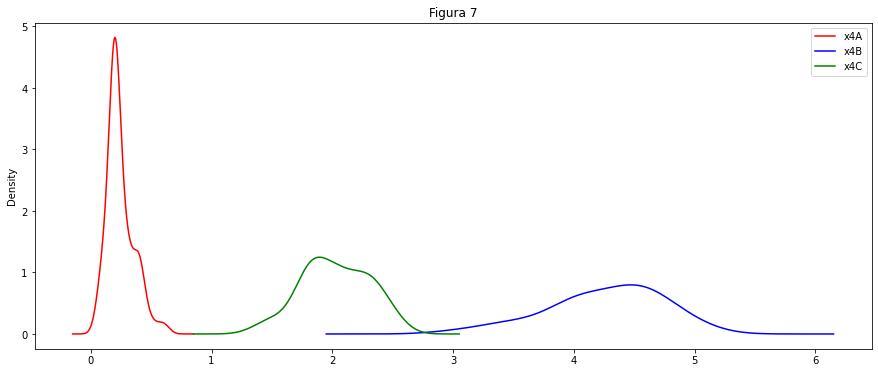

In [43]:
ax = df4A.plot.kde(color= 'red', figsize=(15, 6), label= 'A', title="Figura 7")

df4B.plot.kde(color= 'blue', label= 'B',ax=ax)  # al decirle ax=ax lo ubicamos en el mismo gráfico anterior
df4C.plot.kde(color= 'green',label= 'C',ax=ax)

### Variable x1

Veamos si se cumplen las condiciones para aplicar ANOVA

#### Cada uno de los k subconjuntos de x debe responder a una distribución normal.

ya habíamos separado en los 3 subgrupos a los valores de x1, los teníamos en x1A, x1B y x1C.  

Podemos inspeccionar visualmente como ya lo habíamos hecho: 

<AxesSubplot:title={'center':'Figura 6'}, ylabel='Density'>

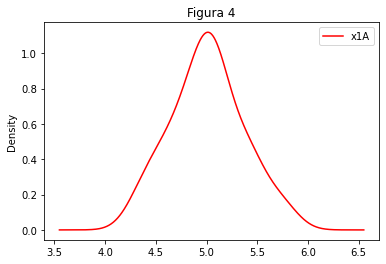

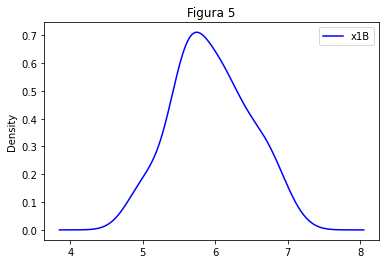

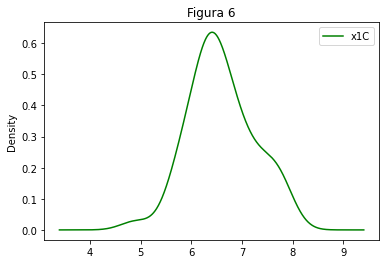

In [44]:
df1A.plot.kde(color='red', title='Figura 4')
df1B.plot.kde(color='blue', title='Figura 5')
df1C.plot.kde(color='green', title='Figura 6')

<AxesSubplot:title={'center':'Figura 6'}, ylabel='Density'>

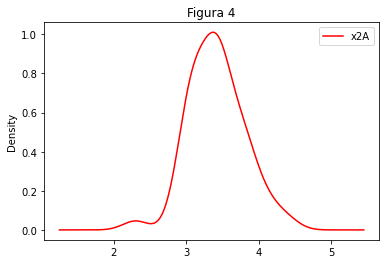

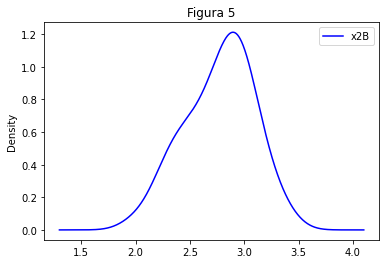

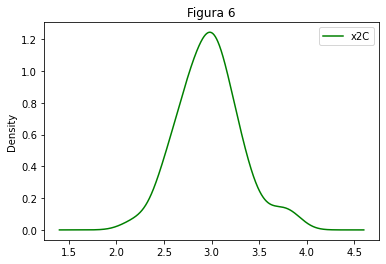

In [45]:
df2A.plot.kde(color='red', title='Figura 4')
df2B.plot.kde(color='blue', title='Figura 5')
df2C.plot.kde(color='green', title='Figura 6')

<AxesSubplot:title={'center':'Figura 6'}, ylabel='Density'>

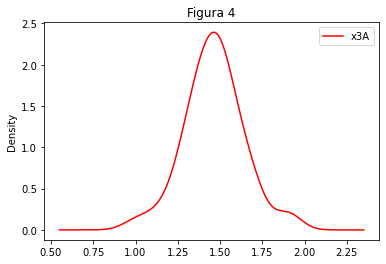

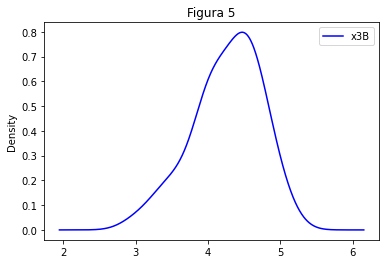

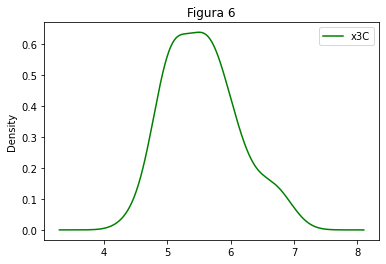

In [52]:
df3A.plot.kde(color='red', title='Figura 4')
df3B.plot.kde(color='blue', title='Figura 5')
df3C.plot.kde(color='green', title='Figura 6')

Si queremos utilizar un valor numérico podemos usar la prueba de Shapiro con un $\alpha =0.05$

<AxesSubplot:title={'center':'Figura 6'}, ylabel='Density'>

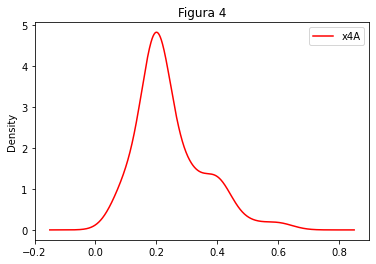

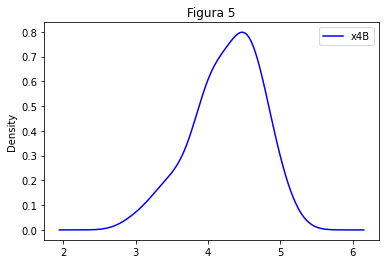

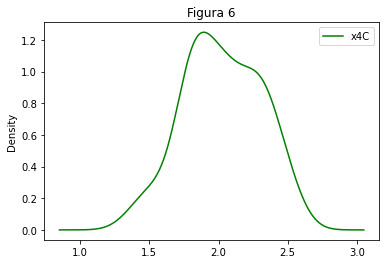

In [51]:
df4A.plot.kde(color='red', title='Figura 4')
df4B.plot.kde(color='blue', title='Figura 5')
df4C.plot.kde(color='green', title='Figura 6')

In [49]:
from scipy.stats import shapiro


alpha = 0.05
W, p = shapiro(x1A)
print('W Shapiro-Wilk= ', round(W,3) ) 
print('p=', round(p,3))


if p > alpha:
    print('No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana')
else:
    print('Se rechaza la Hipótesis de que es Gaussiana (H0)')

W Shapiro-Wilk=  0.978
p= 0.46
No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana


### MUTUAL INFORMATION para Clasificación

In [54]:
from sklearn.feature_selection import mutual_info_classif

In [55]:
X1 = np.array(df['sepal length']).reshape(-1, 1)  # por el formato necesario para que lo tome correctamente

MI = mutual_info_classif(X1, df['iris'], discrete_features='auto', n_neighbors=3, copy=True, random_state=123)

if MI[0] > 0: 
    print("MI> 0 : ", MI, "Existe relación entre las variables" )
else:
    print("MI= 0 : ", MI, "NO existe relación entre las variables" )

MI> 0 :  [0.50701027] Existe relación entre las variables


### Variable x2

Veamos si se cumplen las condiciones para aplicar ANOVA

Primero separamos los valores de X2 en 3 grupos según la clase que le corresponda en y:


In [57]:
alpha = 0.05
W, p = shapiro(x2A)
print('W Shapiro-Wilk= ', round(W,3) ) 
print('p=', round(p,3))


if p > alpha:
    print('No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana')
else:
    print('Se rechaza la Hipótesis de que es Gaussiana (H0)')

W Shapiro-Wilk=  0.969
p= 0.205
No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana


In [65]:
alpha = 0.05
W, p = shapiro(x2B)
print('W Shapiro-Wilk= ', round(W,3) ) 
print('p=', round(p,3))


if p > alpha:
    print('No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana')
else:
    print('Se rechaza la Hipótesis de que es Gaussiana (H0)')

W Shapiro-Wilk=  0.974
p= 0.338
No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana


In [66]:
alpha = 0.05
W, p = shapiro(x2C)
print('W Shapiro-Wilk= ', round(W,3) ) 
print('p=', round(p,3))


if p > alpha:
    print('No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana')
else:
    print('Se rechaza la Hipótesis de que es Gaussiana (H0)')

W Shapiro-Wilk=  0.967
p= 0.181
No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana


In [67]:
alpha = 0.05
W, p = shapiro(x3A)
print('W Shapiro-Wilk= ', round(W,3) ) 
print('p=', round(p,3))


if p > alpha:
    print('No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana')
else:
    print('Se rechaza la Hipótesis de que es Gaussiana (H0)')

W Shapiro-Wilk=  0.955
p= 0.055
No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana


In [68]:
alpha = 0.05
W, p = shapiro(x3B)
print('W Shapiro-Wilk= ', round(W,3) ) 
print('p=', round(p,3))


if p > alpha:
    print('No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana')
else:
    print('Se rechaza la Hipótesis de que es Gaussiana (H0)')

W Shapiro-Wilk=  0.966
p= 0.158
No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana


In [69]:
alpha = 0.05
W, p = shapiro(x3C)
print('W Shapiro-Wilk= ', round(W,3) ) 
print('p=', round(p,3))


if p > alpha:
    print('No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana')
else:
    print('Se rechaza la Hipótesis de que es Gaussiana (H0)')

W Shapiro-Wilk=  0.962
p= 0.11
No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana


In [70]:
alpha = 0.05
W, p = shapiro(x4A)
print('W Shapiro-Wilk= ', round(W,3) ) 
print('p=', round(p,3))


if p > alpha:
    print('No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana')
else:
    print('Se rechaza la Hipótesis de que es Gaussiana (H0)')

W Shapiro-Wilk=  0.814
p= 0.0
Se rechaza la Hipótesis de que es Gaussiana (H0)


In [73]:
X4A = np.array(df['sepal length']).reshape(-1, 1)  # por el formato necesario para que lo tome correctamente

MI = mutual_info_classif(X4A, df['iris'], discrete_features='auto', n_neighbors=3, copy=True, random_state=123)

if MI[0] > 0: 
    print("MI> 0 : ", MI, "Existe relación entre las variables" )
else:
    print("MI= 0 : ", MI, "NO existe relación entre las variables" )

MI> 0 :  [0.50701027] Existe relación entre las variables


In [71]:
alpha = 0.05
W, p = shapiro(x4B)
print('W Shapiro-Wilk= ', round(W,3) ) 
print('p=', round(p,3))


if p > alpha:
    print('No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana')
else:
    print('Se rechaza la Hipótesis de que es Gaussiana (H0)')

W Shapiro-Wilk=  0.948
p= 0.027
Se rechaza la Hipótesis de que es Gaussiana (H0)


In [74]:
X4B = np.array(df['sepal length']).reshape(-1, 1)  # por el formato necesario para que lo tome correctamente

MI = mutual_info_classif(X4B, df['iris'], discrete_features='auto', n_neighbors=3, copy=True, random_state=123)

if MI[0] > 0: 
    print("MI> 0 : ", MI, "Existe relación entre las variables" )
else:
    print("MI= 0 : ", MI, "NO existe relación entre las variables" )

MI> 0 :  [0.50701027] Existe relación entre las variables


In [72]:
alpha = 0.05
W, p = shapiro(x4C)
print('W Shapiro-Wilk= ', round(W,3) ) 
print('p=', round(p,3))


if p > alpha:
    print('No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana')
else:
    print('Se rechaza la Hipótesis de que es Gaussiana (H0)')

W Shapiro-Wilk=  0.96
p= 0.087
No es posible rechazar la Hipótesis (H0) de que es Gaussiana, así que asumiremos que es una distribución Gaussiana


#### Homogeneidad de las Varianzas: Las varianzas dentro de cada uno de los k subconjuntos de x deben ser iguales

Calculemos las varianzas de cada grupo y luego calculemos el ratio que hay entre la mayor y la menor:

In [75]:
var_x1A=np.var(x1A)
var_x1B=np.var(x1B)
var_x1C=np.var(x1C)

max_var=np.max([var_x1A,var_x1B,var_x1C])
min_var=np.min([var_x1A,var_x1B,var_x1C])

ratio_var_x2=max_var/min_var
print('ratio_var_x1= ', ratio_var_x2)

ratio_var_x1=  3.254295193981802


In [76]:
var_x2A=np.var(x2A)
var_x2B=np.var(x2B)
var_x2C=np.var(x2C)

max_var=np.max([var_x2A,var_x2B,var_x2C])
min_var=np.min([var_x2A,var_x2B,var_x2C])

ratio_var_x2=max_var/min_var
print('ratio_var_x1= ', ratio_var_x2)

ratio_var_x1=  1.474362694300518


In [77]:
var_x3A=np.var(x3A)
var_x3B=np.var(x3B)
var_x3C=np.var(x3C)

max_var=np.max([var_x3A,var_x3B,var_x3C])
min_var=np.min([var_x3A,var_x3B,var_x3C])

ratio_var_x2=max_var/min_var
print('ratio_var_x1= ', ratio_var_x2)

ratio_var_x1=  10.117136659436012


In [78]:
var_x4A=np.var(x4A)
var_x4B=np.var(x4B)
var_x4C=np.var(x4C)

max_var=np.max([var_x4A,var_x4B,var_x4C])
min_var=np.min([var_x4A,var_x4B,var_x4C])

ratio_var_x2=max_var/min_var
print('ratio_var_x1= ', ratio_var_x2)

ratio_var_x1=  6.562855113636365
